In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns 

In [26]:
data = pd.read_csv('HEART - heart 2.csv')
data.head(10)

,resting_blood_pressure,age,max_heart_rate_achieved
0,128,45,170
1,110,54,158
2,125,77,162
3,152,40,181
4,178,59,0
5,130,42,150
6,150,60,157
7,150,57,112
8,170,59,140
9,120,50,158


In [27]:
IQR = data["max_heart_rate_achieved"].quantile(0.75) - data["max_heart_rate_achieved"].quantile(0.25)
IQR

36.0

In [28]:
upper_limit = data["max_heart_rate_achieved"].quantile(0.75) + (IQR * 1.5)
upper_limit_extreme = data["max_heart_rate_achieved"].quantile(0.75) + (IQR * 3)
upper_limit, upper_limit_extreme

(222.0, 276.0)

In [29]:
total = np.float(data.shape[0])
print('Total borrowers: {}'.format(data["max_heart_rate_achieved"].shape[0]/total))
print('Borrowers that earn > 178k: {}'.format(data[data["max_heart_rate_achieved"]>178000].shape[0]/total))
print('Borrowers that earn > 256k: {}'.format(data[data["max_heart_rate_achieved"]>256000].shape[0]/total))

Total borrowers: 1.0
Borrowers that earn > 178k: 0.0
Borrowers that earn > 256k: 0.0


In [12]:
from scipy import stats

In [13]:
z = stats.zscore(data)
print(z)

[[-9.11713661e-02 -2.20354312e-01 -9.58122915e-02]
 [-1.14164690e-01 -1.00604568e-01 -1.04457371e-01]
 [-9.50035867e-02  2.05422554e-01 -1.01575678e-01]
 [-6.05136015e-02 -2.86881947e-01 -8.78876356e-02]
 [-2.73010232e-02 -3.40769332e-02 -2.18284246e-01]
 [-8.86165524e-02 -2.60270893e-01 -1.10220757e-01]
 [-6.30684152e-02 -2.07714061e-02 -1.05177794e-01]
 [-6.30684152e-02 -6.06879872e-02 -1.37596841e-01]
 [-3.75202781e-02 -3.40769332e-02 -1.17424989e-01]
 [-1.01390621e-01 -1.53826677e-01 -1.04457371e-01]
 [-1.01390621e-01  5.90617562e-02 -1.09500333e-01]
 [ 1.43660724e+00 -2.60270893e-01 -9.00489054e-02]
 [-7.58424838e-02  3.24507021e-02 -1.04457371e-01]
 [-7.83972975e-02 -2.20354312e-01 -1.08779910e-01]
 [-1.01390621e-01 -3.13493001e-01 -8.71672124e-02]
 [-7.07328564e-02 -1.53826677e-01 -1.27510915e-01]
 [-8.86165524e-02 -2.20354312e-01 -9.22101752e-02]
 [-8.86165524e-02 -2.07714061e-02 -1.14543296e-01]
 [-8.86165524e-02 -4.33242744e-01 -7.27587471e-02]
 [-8.09521112e-02 -4.73824602e-

In [14]:
threshold = 3
print(np.where(z > 3))

(array([ 44,  53, 118, 129, 135], dtype=int64), array([0, 2, 1, 2, 1], dtype=int64))


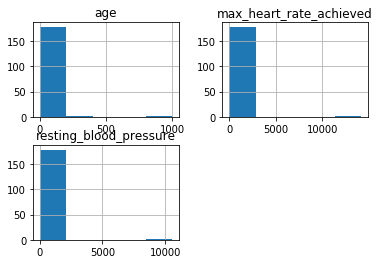

In [43]:
fig = data.hist(bins=5)

<function matplotlib.pyplot.show(*args, **kw)>

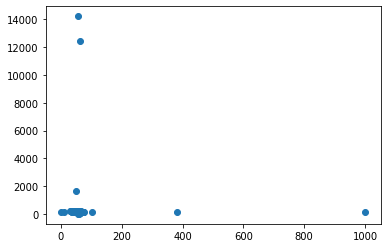

In [49]:
fig, ax = plt.subplots()
ax.scatter(data.age, data.max_heart_rate_achieved)
plt.show

In [50]:
index = data[(data >= 256000)].index
data.drop(index, inplace=True)